# **ML ON MEDICAL DATASET**

### **Importing necessary packages**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,plot_confusion_matrix, plot_precision_recall_curve

### ****Data Preparation & Exploration****

In [2]:
df=pd.read_csv(r'C:\Users\adith\Desktop\FInal year project\diabetic_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


First ,we will remove ID columns because this will not contribute to our model

In [5]:
#removing id columns
df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

Removing Columns which contain unique values

In [6]:
list_unique_columns=[]
for i in df.columns:
    if len(df[i].value_counts())==1:
        list_unique_columns.append(i)
for i in list_unique_columns:
    df.drop([i],axis=1,inplace=True)
#Unique ones ['examide', 'citoglipton']  

In our dataset, we have '?' as a value for many records so replace it with None.

In [7]:
#replace ? with nan
df=df.replace('?',np.nan)  

Checking whether our data has missing values

In [8]:
#missing value function
def missi
+ng_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt    

missing_data(df)['Percent'].sort_values(ascending=False)

SyntaxError: invalid syntax (3247199949.py, line 2)

As we can see above the dataset,Weight column has 96% of missing values followed by medical_specialty(49%) and payer code(39%)

**Null Handling**

In [ ]:
#weight column since it has more missing value 
df['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Since weight is not filled often we are creating new flag column and dropping original column

In [ ]:
df['has_weight']=df['weight'].notnull().astype('int')
df.drop(['weight'],axis=1,inplace=True)

Analyzing medical_speciality column

In [ ]:
df['medical_specialty'].isnull().sum()
df['medical_specialty']=df['medical_specialty'].fillna('UNK') #filling null with unk
print(df['medical_specialty'].nunique()) #more categories

73


In [ ]:
print(df['medical_specialty'].value_counts())

UNK                              49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


Since many categories has less sample we will change the column into the top 10 specialities and then an other category

In [ ]:
top_10=['UNK','InternalMedicine',
        'Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General',
        'Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

df.loc[~df['medical_specialty'].isin(top_10),'medical_specialty']='Other'

Analyzing payer_code column

In [ ]:
print(df['payer_code'].isnull().sum())

print(df['payer_code'].value_counts())

df['payer_code']=df['payer_code'].fillna('UNK') #filling null with unk

40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


Analyzing race column

In [ ]:
df['race'].isnull().sum()
df['race'].value_counts()

df['race']=df['race'].fillna('UNK') #filling null with unk

**Feature engineering** 

In [ ]:
#Generating output variable
#we need to check whether a patient admitted within 30 days or not
df['target']=(df['readmitted']=='<30').astype('int')

#dropping readmitted column
df.drop(['readmitted'],axis=1,inplace=True)

Analyzing and encoding age column

In [ ]:
print(df['age'].value_counts())

cleanup_age = {"age":     {"[0-10)": 0, "[10-20)": 10,"[20-30)": 20,"[30-40)": 30,"[40-50)": 40,"[50-60)": 50,
    "[60-70)": 60,"[70-80)": 70,"[80-90)": 80,"[90-100)": 90}}

df.replace(cleanup_age, inplace=True)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [ ]:
#analyzing gender column
df['gender'].value_counts()
#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']

* **EDA**
* **Data visualization**

**Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations**

In [ ]:
#Distribution of Readmission
#sns.countplot(df['target']).set_title('Distrinution of Readmission')

**Insight from above graph**: Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

In [ ]:
#checking for balance data
print(sum(df['target'].values)/len(df['target'].values)) 

0.11160244882717688


**NOTE**:Only 11% is re hospitalized so this is imbalance dataset

C:\Users\adith\AppData\Local\Temp\ipykernel_8772\4282138169.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['target'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
C:\Users\adith\AppData\Local\Temp\ipykernel_8772\4282138169.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['target'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

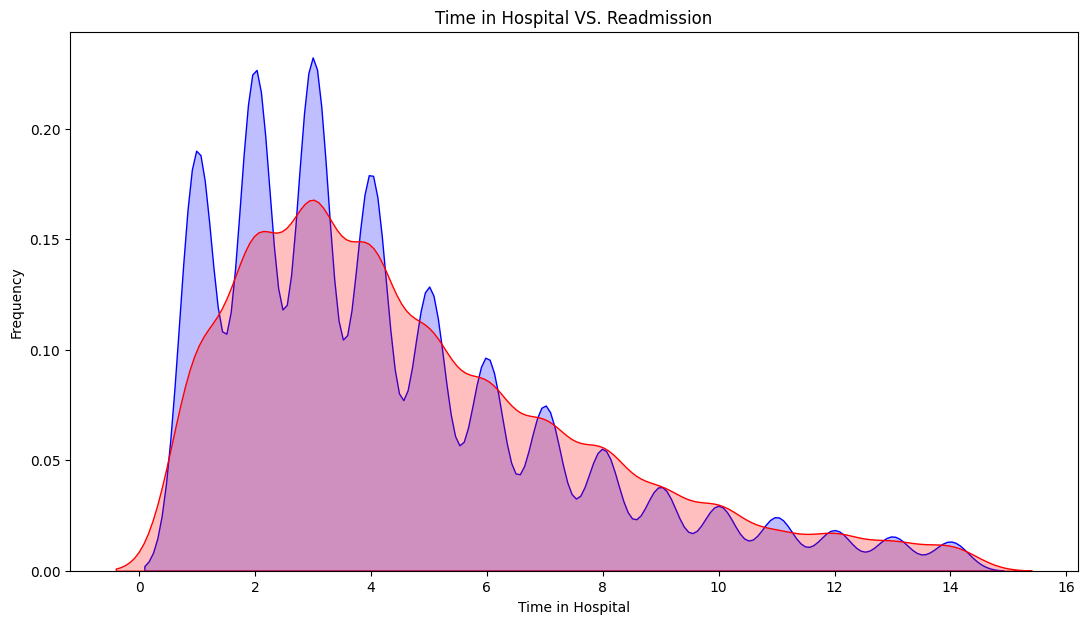

In [ ]:
#time in hospital vs readmitted
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

**Insight from above graph**: If no of days in hospital increased readmission rate is getting decreased.Mostly patient between 3 to 4 days are admitted frequently

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

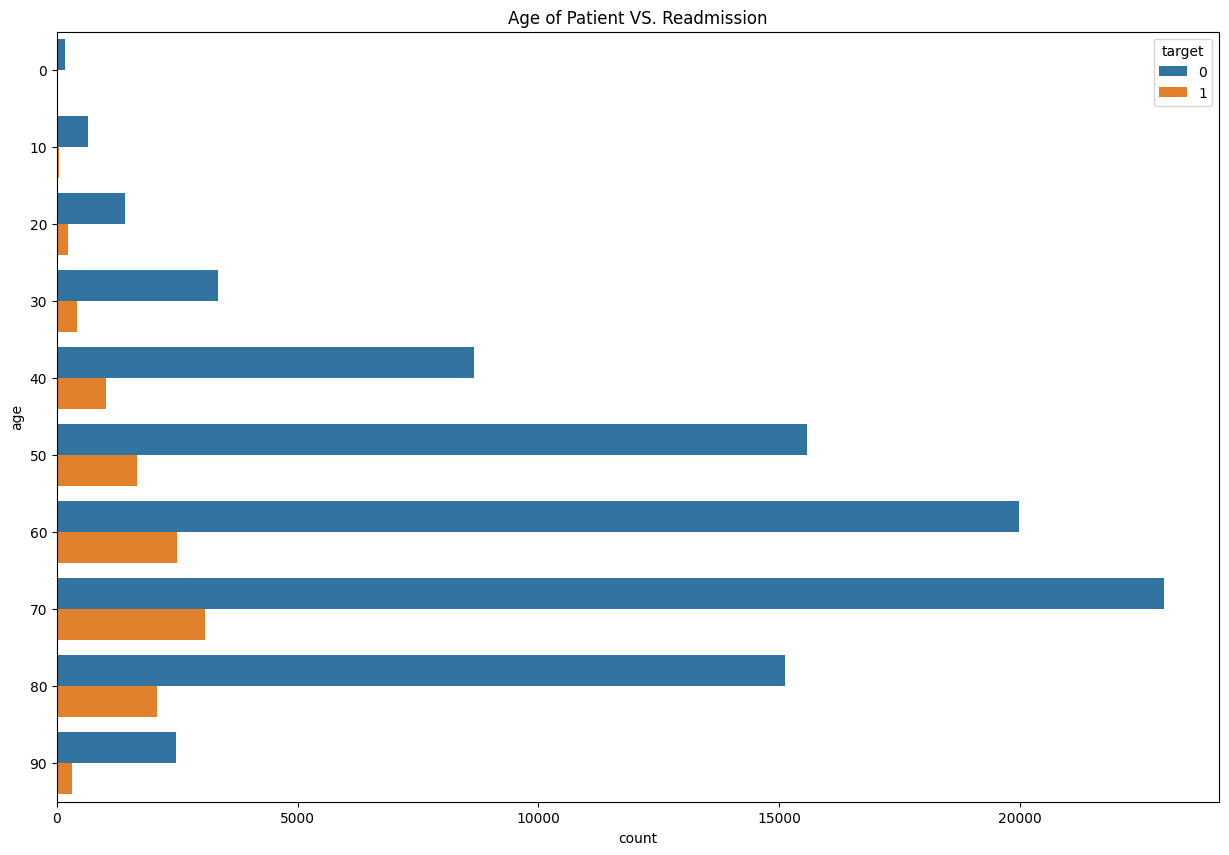

In [ ]:
#age vs readmission

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['target']).set_title('Age of Patient VS. Readmission')

**Insight from above graph**: Patient with age 60 and 70 have more readmission

<AxesSubplot:xlabel='count', ylabel='race'>

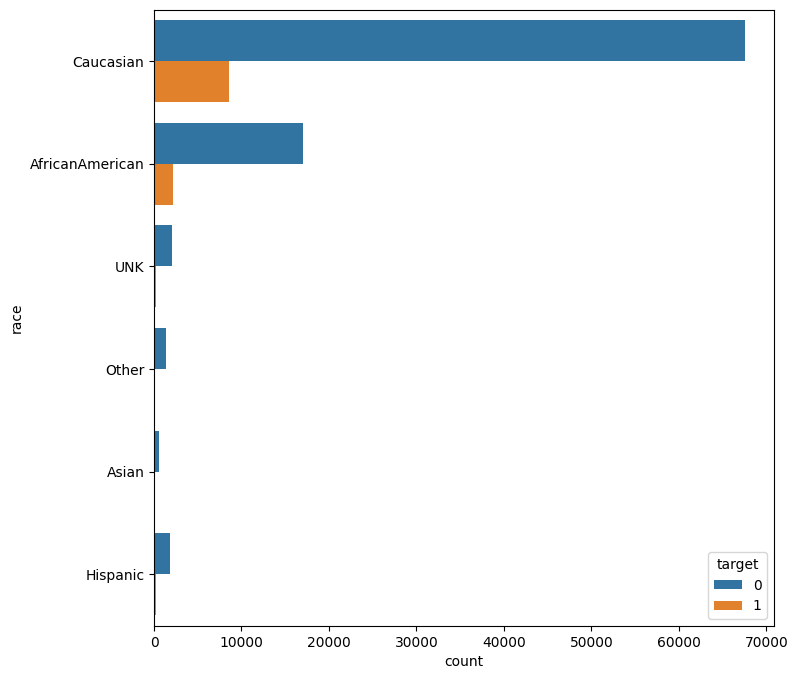

In [ ]:
#race vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['target'])

**Insight from above graph** : Caucasian race has more readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

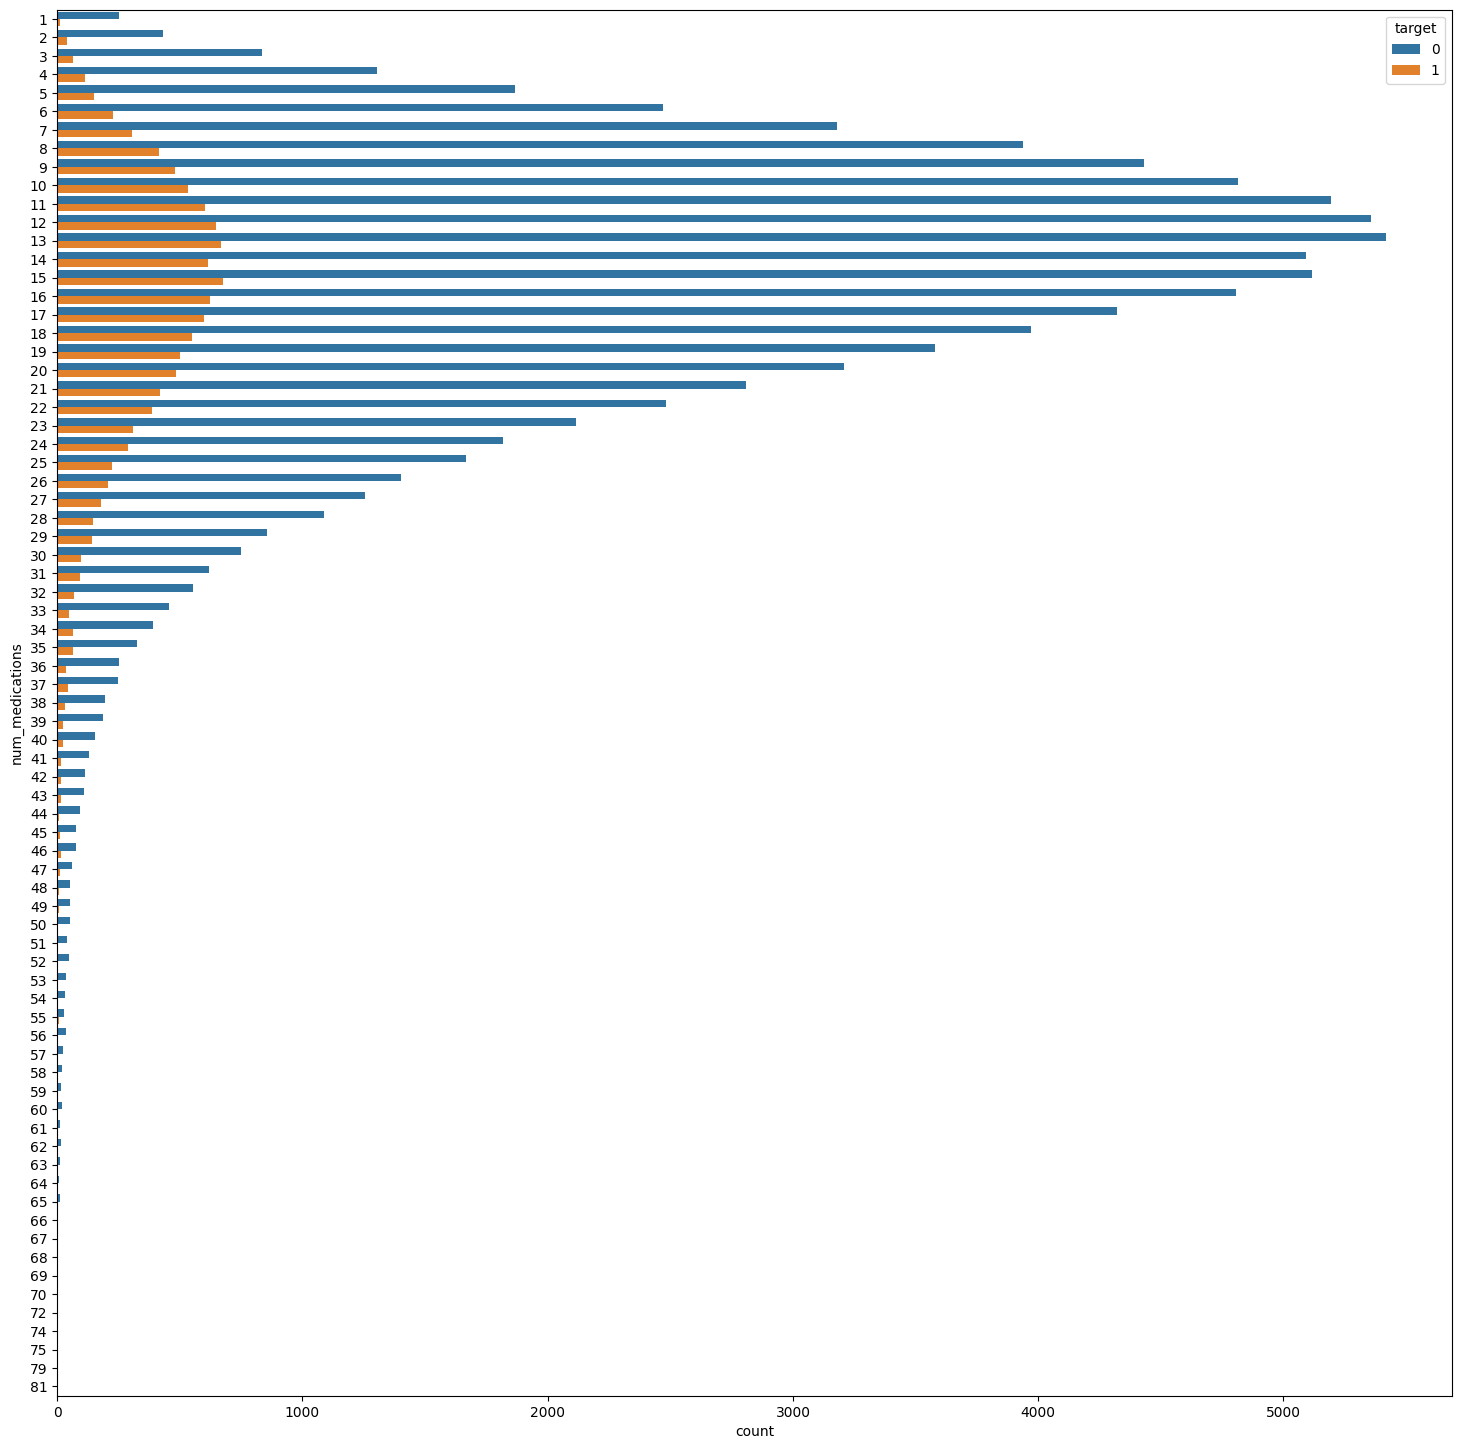

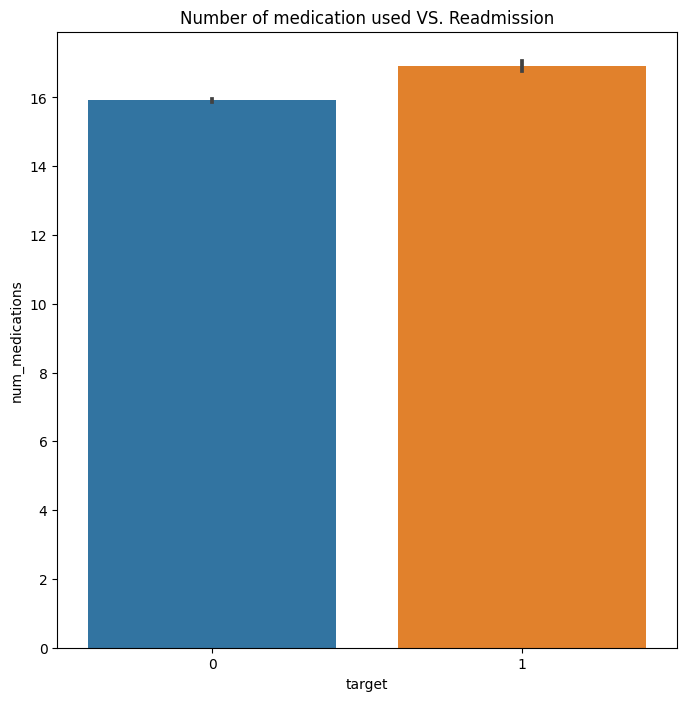

In [ ]:
#Number of medication used VS. Readmission
fig = plt.figure(figsize=(18,18))
sns.countplot(y = df['num_medications'], hue = df['target'])
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['target'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

**Insight from above graph** : If number of medications between 10 and 20 there is more chances that patient will admit again

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

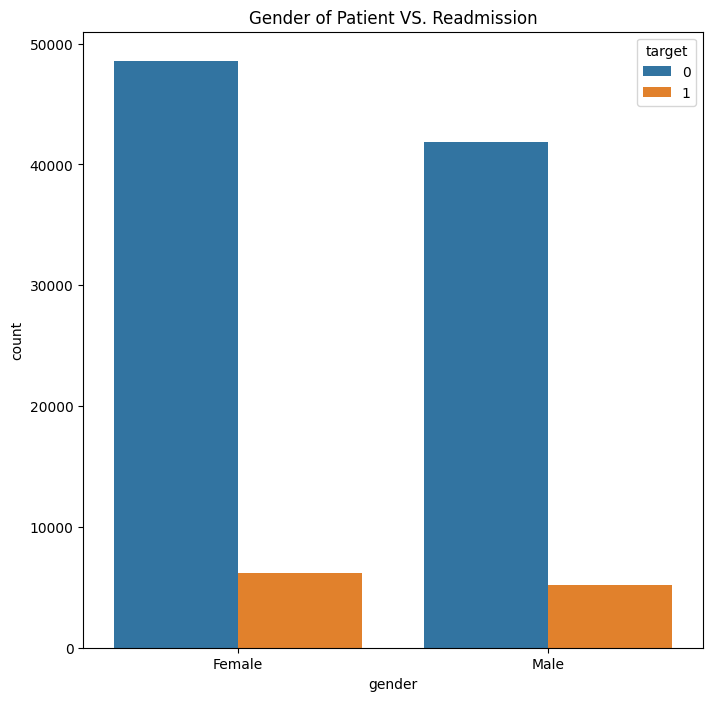

In [ ]:
#Gender and Readmission
#Male = 1
#Female = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(x=df['gender'], hue = df['target']).set_title("Gender of Patient VS. Readmission")

**Insight from above graph** : Readmission rate of both male and female looks similar

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

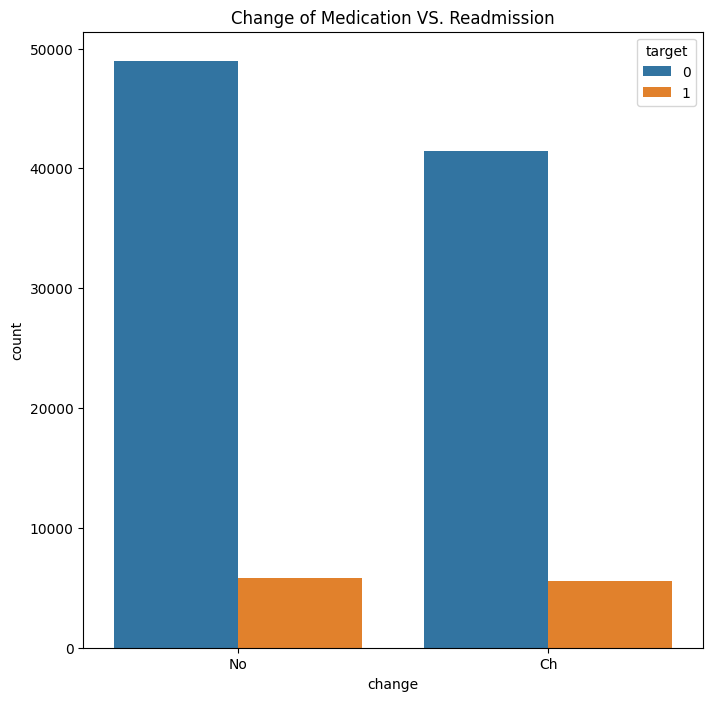

In [ ]:
#change of medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(x = df['change'], hue = df['target']).set_title('Change of Medication VS. Readmission')

**Insight from above graph** :Readmission rate looks similar wheteher the change of mediacation occurs or not

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

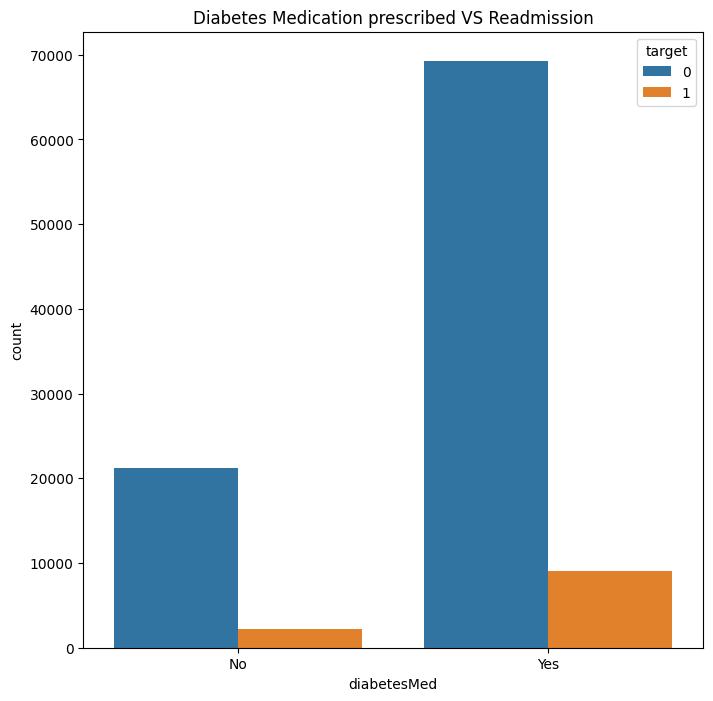

In [ ]:
#diabetic medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(x = df['diabetesMed'], hue = df['target']).set_title('Diabetes Medication prescribed VS Readmission')

**Insight from above graph** : Patients provided with diabetes medication readmitted often

**Glucose Serum test** - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

**'>200'** :  = indicates diabetes
**'>300'** :  = Indicates diabetes
**'Norm'** :  = Normal
**'None'** :  = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

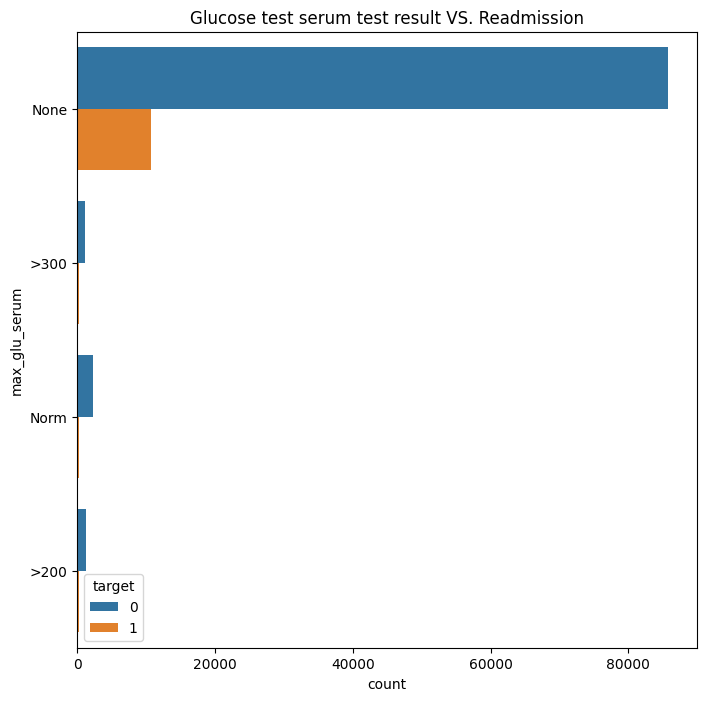

In [ ]:
#max_glue_serum vs target
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['target']).set_title('Glucose test serum test result VS. Readmission')

**Insight from above graph** : Patient who doen't take max glue serum test is readmitted often

**A1C result and Readmission A1C test** - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months



* **'>7'** :1
* **'>8'** :1
* **Norm ** : 0 = Normal
* **None ** : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

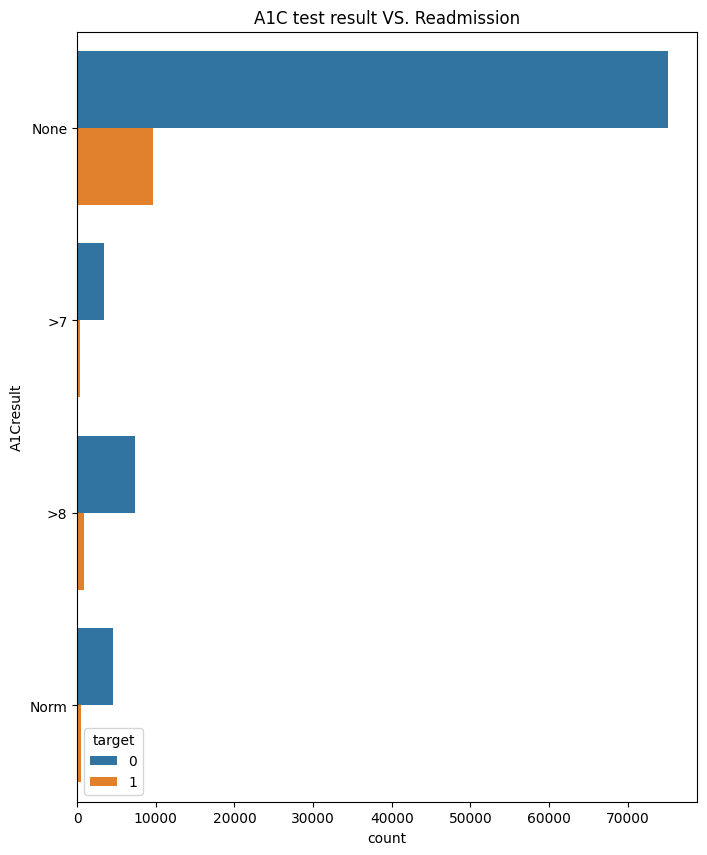

In [ ]:
#a1c test result vs target
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['A1Cresult'], hue = df['target']).set_title('A1C test result VS. Readmission')

**Insight from above graph** : Patient who doen't take a1ctest is readmitted often

C:\Users\adith\AppData\Local\Temp\ipykernel_8772\2986333412.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['target'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
C:\Users\adith\AppData\Local\Temp\ipykernel_8772\2986333412.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['target'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

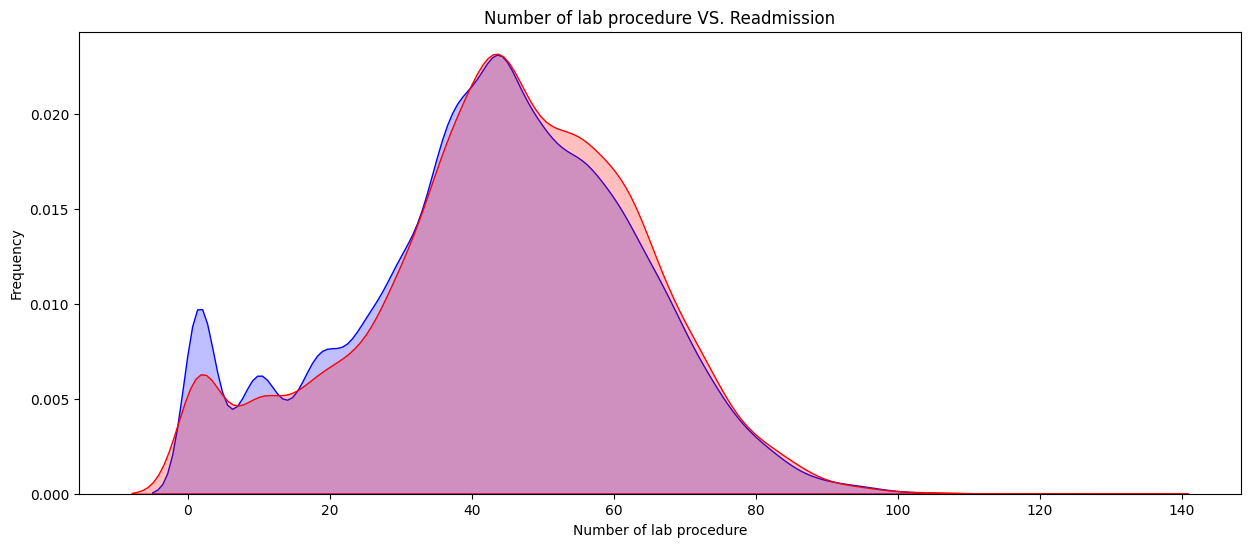

In [ ]:
#no of lab procedure vs target
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

**Insight from above graph** : Both  admission and  readmission have similar pattern for number of lab procedures

Text(0.5, 1.0, 'admission_type_id VS. Readmission')

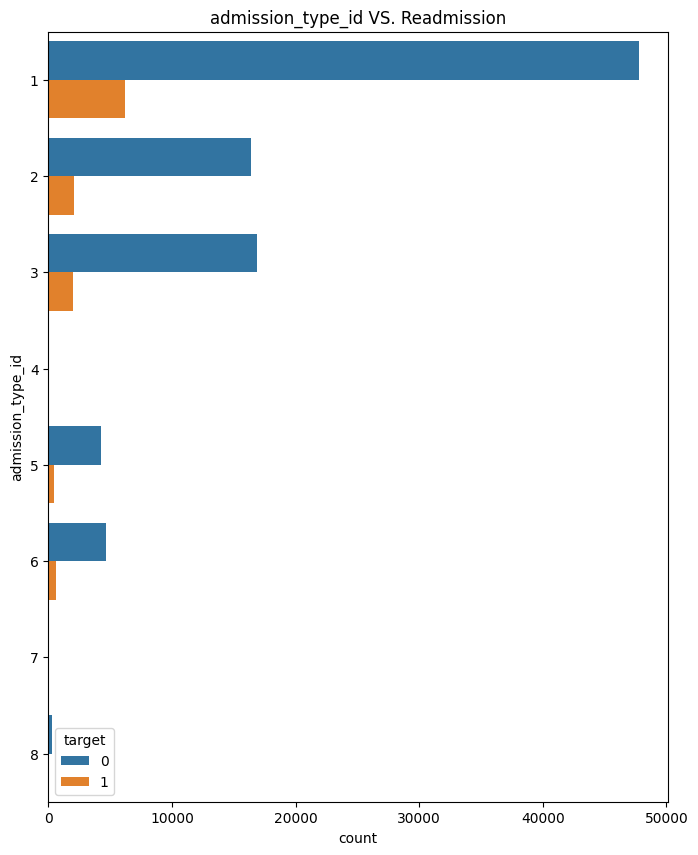

In [ ]:
#admission type vs readmission
#1-	Emergency
#2-Urgent
#3-Elective
#4-Newborn
#5-Not Available
#6-NULL
#7-Trauma Center
#8-Not Mapped

fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['admission_type_id'], hue = df['target']).set_title('admission_type_id VS. Readmission')

**Insight from above graph** : Patient who admitted as emergency has more readmission 

Text(0.5, 1.0, 'discharge_disposition_id VS. Readmission')

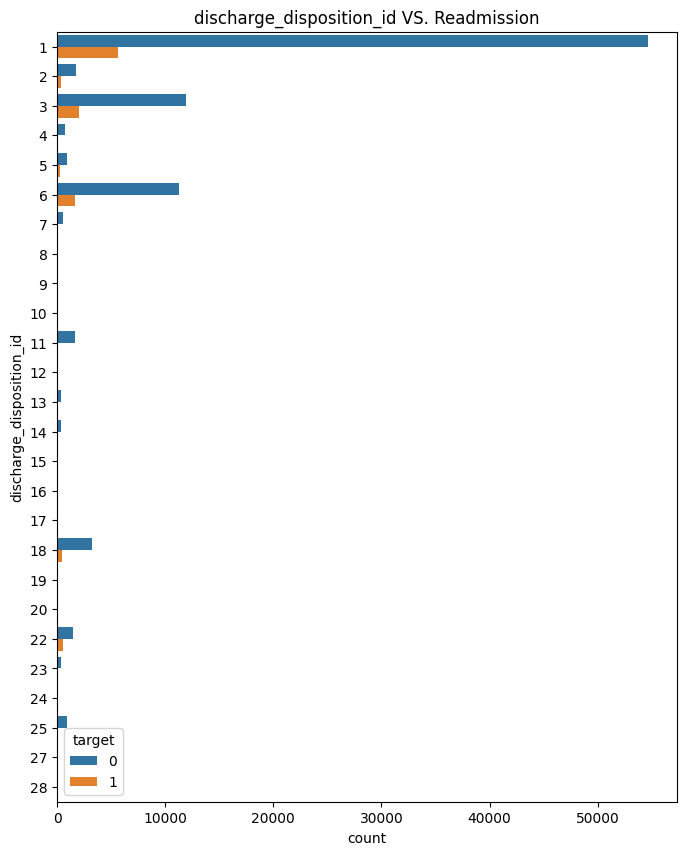

In [ ]:
#discharge_disposition_id VS. Readmission
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['discharge_disposition_id'], hue = df['target']).set_title('discharge_disposition_id VS. Readmission')

**Insight from above graph** : Patient who discharged to home has more readmission rate

**Label Encoding**

In [ ]:
categorical_feature=df.select_dtypes(include='object')
cat=categorical_feature.columns
print(cat)

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


Taking categorical Columns

**Removing diag_ columns bcoz it is categorical and have more levels , this is handled by grouping which is done in later part**

In [ ]:
cat=['race', 'gender', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [ ]:
#taking copy of dataframe
df_copy=df.copy()

**Numeric and categorical columns**: 'admission_type_id','discharge_disposition_id','admission_source_id'

In [ ]:
cols_cat_num=['admission_type_id','discharge_disposition_id','admission_source_id']
df[cols_cat_num]=df[cols_cat_num].astype('str')
df_cat=pd.get_dummies(df[cat+cols_cat_num],drop_first=True)

In [ ]:
print(df_cat.columns)

Index(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'race_UNK', 'gender_Male', 'payer_code_CH', 'payer_code_CM',
       'payer_code_CP', 'payer_code_DM',
       ...
       'admission_source_id_20', 'admission_source_id_22',
       'admission_source_id_25', 'admission_source_id_3',
       'admission_source_id_4', 'admission_source_id_5',
       'admission_source_id_6', 'admission_source_id_7',
       'admission_source_id_8', 'admission_source_id_9'],
      dtype='object', length=137)


In [ ]:
#dropping encoded columns
for i in cat:
    df_copy.drop([i],axis=1,inplace=True)

In [ ]:
#concating encoded columns and other columns
df_copy=pd.concat([df_copy,df_cat],axis=1)

**Checking diag columns**

In [ ]:
df_copy['diag_3'].isnull().sum()
df_copy.dropna(inplace=True)
print(df_copy['diag_1'].nunique())
print(df_copy['diag_2'].nunique())
print(df_copy['diag_3'].nunique())

715
743
789


**Based on icd(international classification of disease) codes we group some disease**

In [ ]:
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df_copy[col] = df_copy[col].str.replace('E','-')
    df_copy[col] = df_copy[col].str.replace('V','-')
    condition = df_copy[col].str.contains('250')
    df_copy.loc[condition,col] = '250'

df_copy[diag_cols] = df_copy[diag_cols].astype(float)

In [ ]:
# diagnosis grouping
for col in diag_cols:
    df_copy['temp']=np.nan
    
    condition = df_copy[col]==250
    #condition = df_copy['diag_1']==250
    df_copy.loc[condition,'temp']='Diabetes'
    
    condition = (df_copy[col]>=390) & (df_copy[col]<=458) | (df_copy[col]==785)
    df_copy.loc[condition,'temp']='Circulatory'
    
    condition = (df_copy[col]>=460) & (df_copy[col]<=519) | (df_copy[col]==786)
    df_copy.loc[condition,'temp']='Respiratory'
    
    condition = (df_copy[col]>=520) & (df_copy[col]<=579) | (df_copy[col]==787)
    df_copy.loc[condition,'temp']='Digestive'
    
    condition = (df_copy[col]>=580) & (df_copy[col]<=629) | (df_copy[col]==788)
    df_copy.loc[condition,'temp']='Genitourinary'
    
    condition = (df_copy[col]>=800) & (df_copy[col]<=999)
    df_copy.loc[condition,'temp']='Injury'
    
    condition = (df_copy[col]>=710) & (df_copy[col]<=739)
    df_copy.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df_copy[col]>=140) & (df_copy[col]<=239)
    df_copy.loc[condition,'temp']='Neoplasms'
    
    condition = df_copy[col]==0
    df_copy.loc[condition,col]='?'
    df_copy['temp']=df_copy['temp'].fillna('Others')
    condition = df_copy['temp']=='0'
    df_copy.loc[condition,'temp']=np.nan
    df_copy[col]=df_copy['temp']
    df_copy.drop('temp',axis=1,inplace=True)

In [ ]:
#ENCODING DIAG_ COLUMNS
df_cat_diag=pd.get_dummies(df_copy[diag_cols],drop_first=True)

#dropping encoded columns
for i in diag_cols:
    df_copy.drop([i],axis=1,inplace=True)

df_copy=pd.concat([df_copy,df_cat_diag],axis=1)

**Model Building**

In [ ]:
X=df_copy.drop(['target'],axis=1)
y=df_copy['target']

**Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.89
Precision is 0.45
Recall is 0.01


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


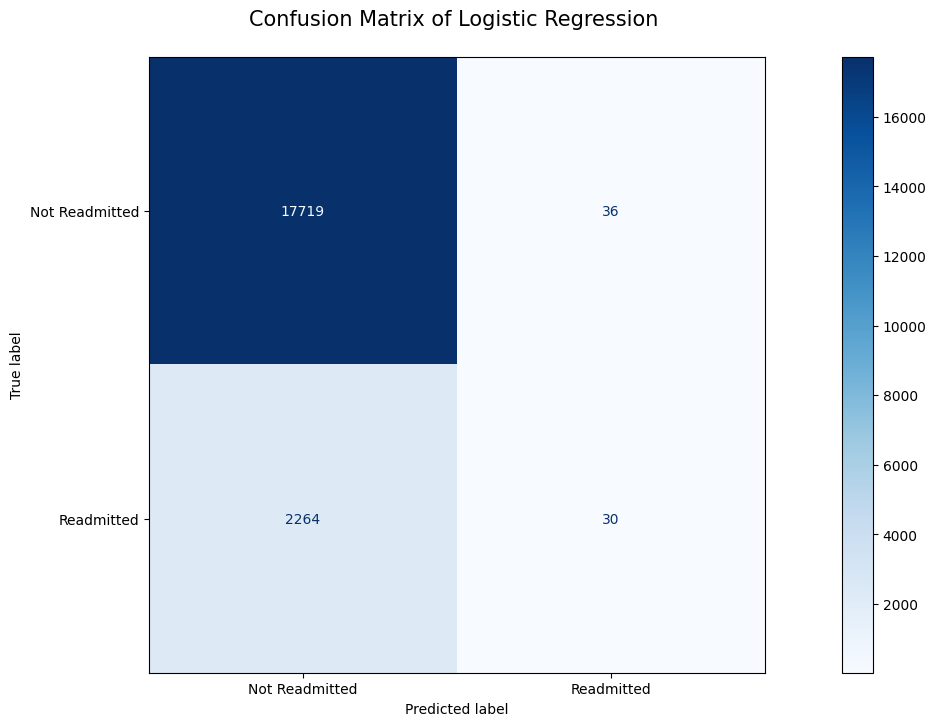

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(logit, X_test, y_test,
                      display_labels = ['Not Readmitted', 'Readmitted'],
                      cmap = 'Blues',
                      ax=ax
                    )
# plt.xticks(rotation=90)
plt.title('Confusion Matrix of Logistic Regression \n', size = 15)
plt.show()

**Gradient Boost**

In [ ]:
import xgboost
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
#SVM_MODEL.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
xgb_prediction = xgb.predict(X_test)

In [ ]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(xgb_prediction, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, xgb_prediction)))
print("Precision is {0:.2f}".format(precision_score(y_test, xgb_prediction)))
print("Recall is {0:.2f}".format(recall_score(y_test, xgb_prediction)))

accuracy_xgb = accuracy_score(y_test, xgb_prediction)
precision_xgb = precision_score(y_test, xgb_prediction)
recall_xgb = recall_score(y_test, xgb_prediction)
#grid = GridSearchCV(estimator=SVM_MODEL, param_grid=parameters, cv=5)
#grid.fit(X_train, y_train)

Accuracy is 0.89
Precision is 0.55
Recall is 0.04


In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports=xgb.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

[[17690    65]
 [ 2213    81]]


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


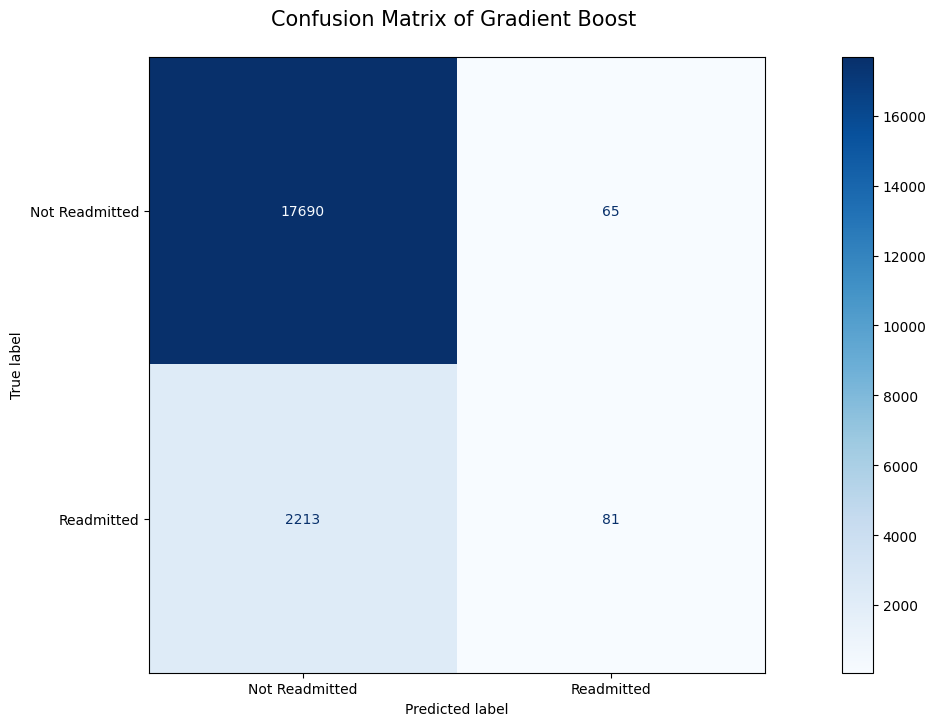

In [ ]:
print(confusion_matrix(y_test, xgb_prediction))
fig, ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(xgb, X_test, y_test,
                      display_labels = ['Not Readmitted', 'Readmitted'],
                      cmap = 'Blues',
                      ax=ax
                    )
# plt.xticks(rotation=90)
plt.title('Confusion Matrix of Gradient Boost \n', size = 15)
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.83
Precision is 0.18
Recall is 0.12


**Feature Importance for Decision Tree**

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


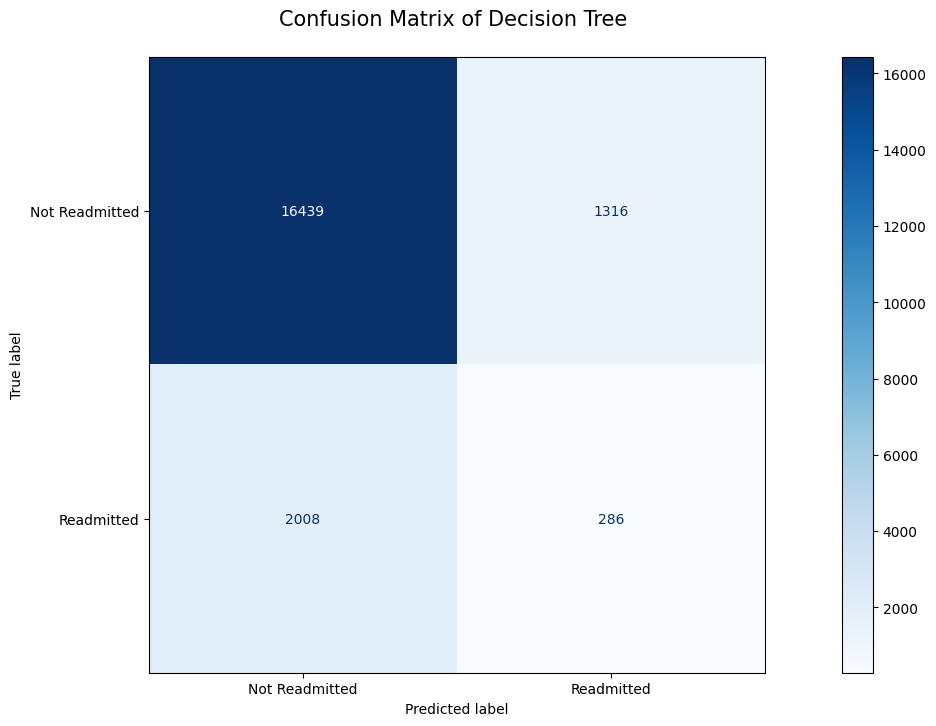

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(dtree, X_test, y_test,
                      display_labels = ['Not Readmitted', 'Readmitted'],
                      cmap = 'Blues',
                      ax=ax
                    )
# plt.xticks(rotation=90)
plt.title('Confusion Matrix of Decision Tree \n', size = 15)
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.89
Precision is 0.62
Recall is 0.01


In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


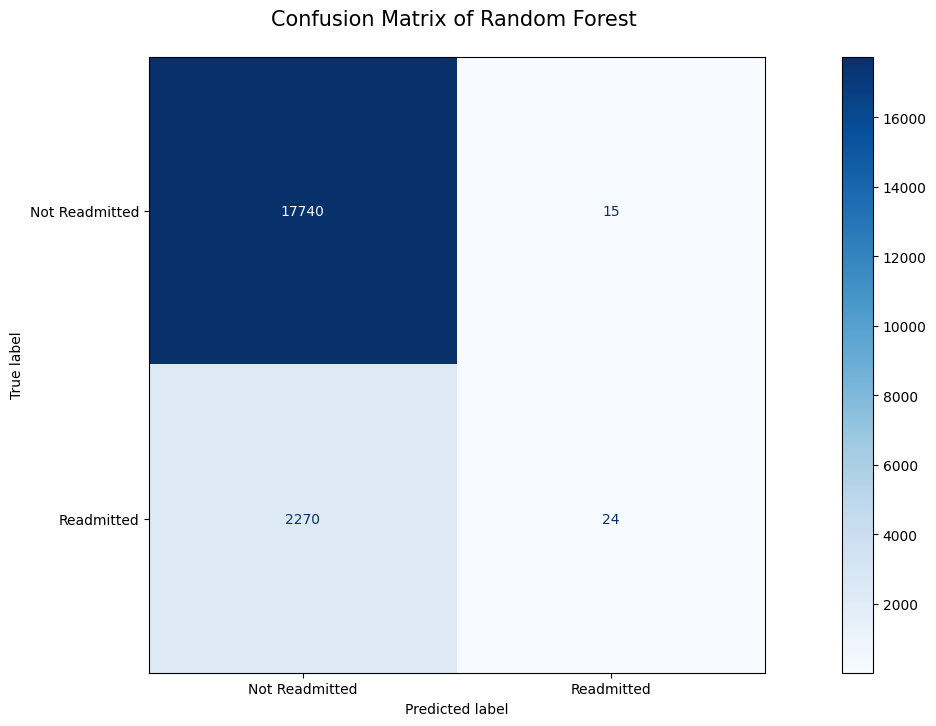

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(rm, X_test, y_test,
                      display_labels = ['Not Readmitted', 'Readmitted'],
                      cmap = 'Blues',
                      ax=ax
                    )
# plt.xticks(rotation=90)
plt.title('Confusion Matrix of Random Forest \n', size = 15)
plt.show()

**Model Comparision**

**Accuracy**

([<matplotlib.axis.XTick at 0x1ee804a9720>,
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Gradient Boost'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forests')])

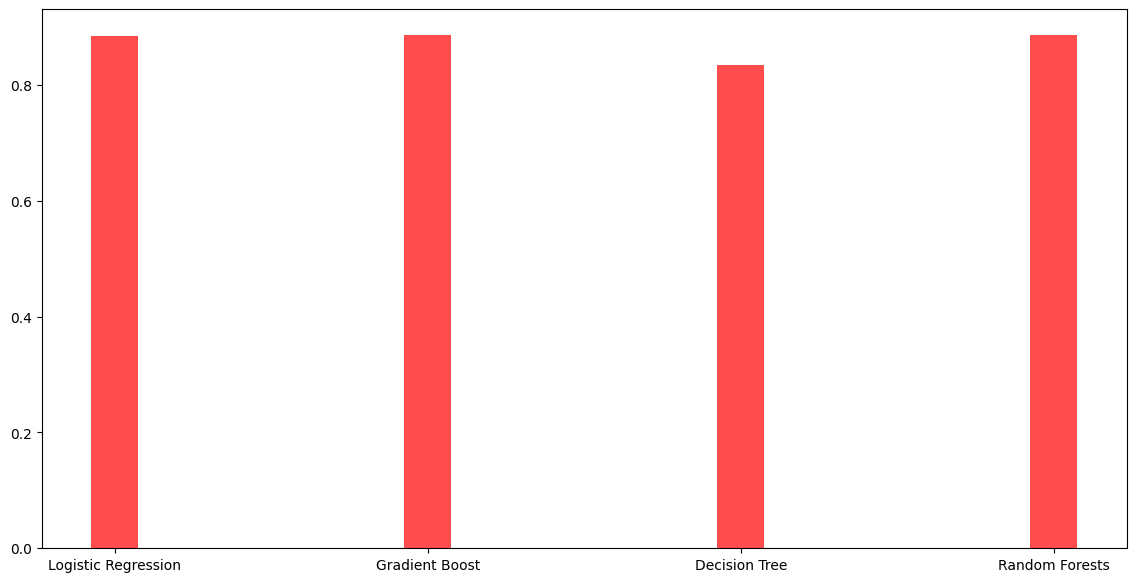

In [ ]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression','Gradient Boost', 'Decision Tree', 'Random Forests']
values = [accuracy_logit, accuracy_xgb, accuracy_dtree, accuracy_rm]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)

**Precision**

([<matplotlib.axis.XTick at 0x1ee8027c070>,
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Gradient boost'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forests')])

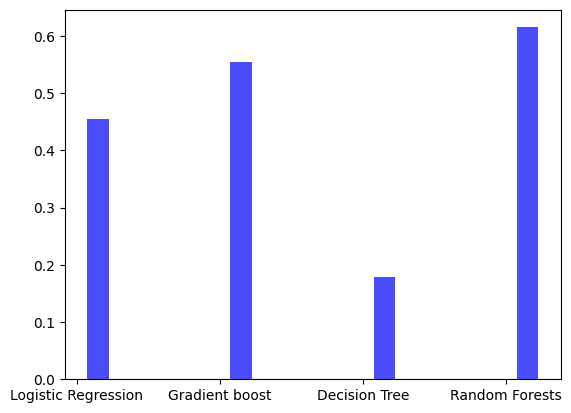

In [ ]:
ax = plt.subplot(111)

models = ['Logistic Regression','Gradient boost','Decision Tree', 'Random Forests']
values = [precision_logit,precision_xgb, precision_dtree, precision_rm]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)

**Recall**

Text(0.5, 1.0, 'Model')

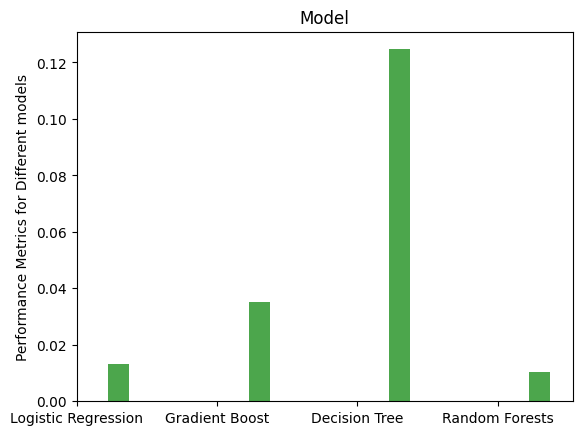

In [ ]:
ax = plt.subplot(111)

models = ['Logistic Regression','Gradient Boost', 'Decision Tree', 'Random Forests' ]
values = [recall_logit,recall_xgb, recall_dtree, recall_rm, ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')